### Árbol de Decisión

1. Cargar las librerías

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from collections import Counter

2. Cargamos los registros

In [3]:
path_entrenamiento = "train.csv"
path_testeo = "test.csv"

df_entrenamiento = pd.read_csv(path_entrenamiento, encoding="utf-8")
df_testeo = pd.read_csv(path_testeo, encoding="utf-8")

df_entrenamiento.head(), df_testeo.head()

(                                       mensaje  tipo
 0  Compra ahora y recibe un descuento especial   ham
 1           Haz clic aqui para ganar un premio  spam
 2                  Tu ordenador tiene un virus  spam
 3        Descubre como perder peso rapidamente  spam
 4                 Necesitas ayuda con tu tarea   ham,
                                         mensaje  tipo
 0           Tu devolucion esta siendo procesada   ham
 1       Gana dinero por compartir tus opiniones  spam
 2  Recordatorio de tu cita con el nutricionista   ham
 3     Quema grasa abdominal con este suplemento  spam
 4                    Agradecemos tu preferencia   ham)

3. Exploramos y limpiamos los datos

In [4]:
# Comprobamos la distribución de las clases
print(f"Distribución entrenamiento: {Counter(df_entrenamiento["tipo"])}")
print(f"Distribución testeo: {Counter(df_testeo["tipo"])}")

# Comprobamos nulos y duplicados
print(f"Nulos: {df_entrenamiento.isnull().sum()}")
print(f"Duplicados: {df_entrenamiento.duplicated().sum()}")

Distribución entrenamiento: Counter({'spam': 521, 'ham': 477})
Distribución testeo: Counter({'ham': 109, 'spam': 100})
Nulos: mensaje    0
tipo       0
dtype: int64
Duplicados: 147


4. Preparar los datos

In [5]:
X_train = df_entrenamiento["mensaje"].values
y_train = df_entrenamiento["tipo"].values

X_test = df_testeo["mensaje"].values
y_test = df_testeo["tipo"].values

5. Entrenamos el modelo: para entrenar el modelo, nuestro código va a convertir los mensajes de texto en una representación numérica
utilizando para ello la librería TF-IDF. Luego entrenaremos un árbol de decisión con los datos procesados.

In [6]:
# 1. Creamos un vectorizador
# Primer intento:
vectorizador = TfidfVectorizer()

# 2. Definir el modelo de árbol de decisión.
# Primer intento:
clasificador = DecisionTreeClassifier(max_depth=3, random_state=42)

# 3. Ajustamos el vectorizador TF-IDF con los datos de entrenamiento
X_train_tfidf = vectorizador.fit_transform(X_train)

# 4. Entrenamos el modelo con los datos transformados
clasificador.fit(X_train_tfidf, y_train)

X_train_tfidf, clasificador

(<998x1450 sparse matrix of type '<class 'numpy.float64'>'
 	with 6606 stored elements in Compressed Sparse Row format>,
 DecisionTreeClassifier(max_depth=3, random_state=42))

6. Evaluamos el modelo

In [7]:
# Transformar los datos de prueba
X_test_tfidf = vectorizador.transform(X_test)

# Vamos a hacer predicciones sobre el conjunto de prueba utilizando el modelo
y_pred = clasificador.predict(X_test_tfidf)

# Obtenemos la accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Imprimimos un reporte de clasificación
print(f"Informe: {classification_report(y_test, y_pred)}")
# Precision: proporción de las predicciones positivas correctas
# Recall/Sensibilidad: proporción los casos reales correctamente predichos
# F1: media armónica entre la preción y la sensiblidad
# Support: número de muestras en cada categoría
# MacroAVG: media de las métricas
# WeightedAVG: como la macro, pero teniendo en cuenta el support (número de muestras)


Accuracy: 0.7033492822966507
Informe:               precision    recall  f1-score   support

         ham       0.78      0.60      0.68       109
        spam       0.65      0.82      0.73       100

    accuracy                           0.70       209
   macro avg       0.72      0.71      0.70       209
weighted avg       0.72      0.70      0.70       209



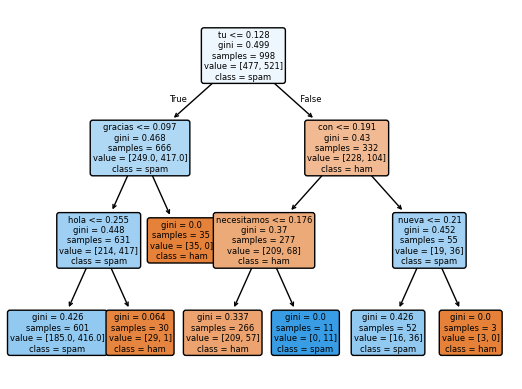

In [8]:
# Visualización del árbol
plt.figure()
plot_tree(
    clasificador,
    feature_names=vectorizador.get_feature_names_out(),
    class_names=["ham", "spam"],
    filled=True,
    rounded=True,
    fontsize=6
)

plt.show()

In [ ]:
# Matriz de confusión

7. Importancia de Características

8. Comprobamos distribuciones y clasificados